# Salary data visualization

**Objective – Explore the dataset and extract insights from the data. Using statistical evidence to**
- Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?
- Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
- Is the proportion of smokers significantly different across different regions?
- Is the mean BMI of women with no children, one child, and two children the same?<br>

<br>

# Context
Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions.

# Data Set
- Age :- This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
- Sex :- This is the policy holder's gender, either male or female.
- BMI :- This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
- Children :- This is an integer indicating the number of children / dependents covered by the insurance plan.
- Smoker :- This is yes or no depending on whether the insured regularly smokes tobacco.
- Region :- This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
- Charges​ :- Individual medical costs billed to health insurance

# Question to be answered
- Are there more Male beneficary ?
- Are there more smoker ?
- Which region has maximum , medical cost billed to health insurance.?
- What is age of beneficary.?
- Do beneficary having more dependents had more medical cost billed.?
-

# Libraries


In [1]:
### IMPORT: ------------------------------------
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid") # set the background for the graphs
from scipy.stats import skew

# from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
# from statsmodels.formula.api import ols      # For n-way ANOVA
# from statsmodels.stats.anova import anova_lm # For n-way ANOVA
# from   scipy.stats import chi2_contingency   # For Chi-Sq

# Read and Understand Data

In [2]:
#Reading the csv file AxisInsurance.csv
df = pd.read_csv('Salary Data.csv')
insured=df.copy()

In [3]:
# inspect data, print top 5
insured.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
# bottom 5 rows:
insured.tail(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


In [5]:
insured.info()    #it give information about datatype of different columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [6]:
insured.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [7]:
insured.shape
#get the size of dataframe
print ("Rows     : " , insured.shape[0])
print ("Columns  : " , insured.shape[1])


Rows     :  375
Columns  :  6


In [8]:
insured[insured['Gender']==""]
# gender empty vayeko row lai print garxa

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [9]:
insured.isnull().sum().values.sum() # null values haru xa ki xaina check garxa ie row or column khali xa ki xaina herxa

12

In [10]:
insured= insured.dropna() 
# null rows lai delete garxa

In [11]:
print ("\nValues : \n", insured.values)
print ("\nFeatures : \n", list(insured.columns))
# print ("\nFeatures : \n", list(insured.columns.to_list()))

# print ("\nMissing values :  ", insured.isnull().sum().values.sum())

# print ("\nUnique values :  \n", insured.nunique())



Values : 
 [[32.0 'Male' "Bachelor's" 'Software Engineer' 5.0 90000.0]
 [28.0 'Female' "Master's" 'Data Analyst' 3.0 65000.0]
 [45.0 'Male' 'PhD' 'Senior Manager' 15.0 150000.0]
 ...
 [29.0 'Female' "Bachelor's" 'Junior Project Manager' 2.0 40000.0]
 [34.0 'Male' "Bachelor's" 'Senior Operations Coordinator' 7.0 90000.0]
 [44.0 'Female' 'PhD' 'Senior Business Analyst' 15.0 150000.0]]

Features : 
 ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']


In [12]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


**Types of variables**

- Categorical varibles - educational level, job title, gender
-  Quantitative variables -age, years of experience are continous variables.

- There are no missing values

In [13]:
#changing object dtype to category  to save memory
insured['Gender']=insured['Gender'].astype("category")
insured['Education Level']=insured['Education Level'].astype("category")
insured['Job Title']=insured['Job Title'].astype("category")


In [14]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  373 non-null    float64 
 1   Gender               373 non-null    category
 2   Education Level      373 non-null    category
 3   Job Title            373 non-null    category
 4   Years of Experience  373 non-null    float64 
 5   Salary               373 non-null    float64 
dtypes: category(3), float64(3)
memory usage: 18.8 KB


In [15]:
insured.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [16]:
#Are there more Male beneficary ?
# Are there more smoker ?
# which region has maximum , claims .?

insured.describe(include='category')

,Gender,Education Level,Job Title
count,373,373,373
unique,2,3,174
top,Male,Bachelor's,Director of Marketing
freq,194,224,12


In [17]:
list_col=  insured.select_dtypes(['category']).columns
list_col

Index(['Gender', 'Education Level', 'Job Title'], dtype='object')

In [18]:
for i in list_col:
  print(insured[i].value_counts())

Male      194
Female    179
Name: Gender, dtype: int64
Bachelor's    224
Master's       98
PhD            51
Name: Education Level, dtype: int64
Director of Marketing                 12
Director of Operations                11
Senior Business Analyst               10
Senior Marketing Analyst               9
Senior Marketing Manager               9
                                      ..
Junior Designer                        1
Junior Data Scientist                  1
Junior Data Analyst                    1
Junior Customer Support Specialist     1
Web Developer                          1
Name: Job Title, Length: 174, dtype: int64


In [19]:
# get counts of unique observations for each category variable
list_col=  insured.select_dtypes(['category']).columns
for i in range(len(list_col)):
    print(insured[list_col[i]].value_counts())

Male      194
Female    179
Name: Gender, dtype: int64
Bachelor's    224
Master's       98
PhD            51
Name: Education Level, dtype: int64
Director of Marketing                 12
Director of Operations                11
Senior Business Analyst               10
Senior Marketing Analyst               9
Senior Marketing Manager               9
                                      ..
Junior Designer                        1
Junior Data Scientist                  1
Junior Data Analyst                    1
Junior Customer Support Specialist     1
Web Developer                          1
Name: Job Title, Length: 174, dtype: int64


# Exploratory Data Analysis

## Univariate Analysis

In [20]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage


Index(['Gender', 'Education Level', 'Job Title'], dtype='object')
CategoricalIndex(['Male', 'Female'], categories=['Female', 'Male'], ordered=False, dtype='category')
CategoricalIndex(['Bachelor's', 'Master's', 'PhD'], categories=['Bachelor's', 'Master's', 'PhD'], ordered=False, dtype='category')


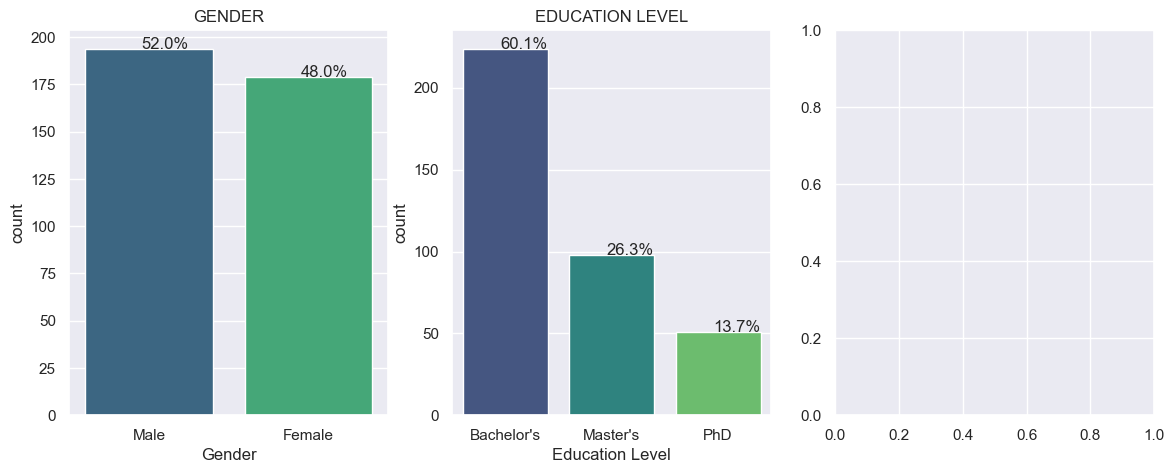

In [21]:
#get all category datatype
list_col=  insured.select_dtypes(['category']).columns
print(list_col)
fig1, axes1 =plt.subplots(1,3,figsize=(14, 5))
for i in range((len(list_col))-1):
    # order = insured[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    order = insured[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order

    axis=sns.countplot(x=list_col[i], data=insured , order=order,ax=axes1[i],palette='viridis').set(title=list_col[i].upper())
    bar_perc(axes1[i],insured[list_col[i]])
    print(order)

In [80]:
# Basic alternate visualization

In [22]:
len(insured[insured['Gender'] == 'Female'])

179

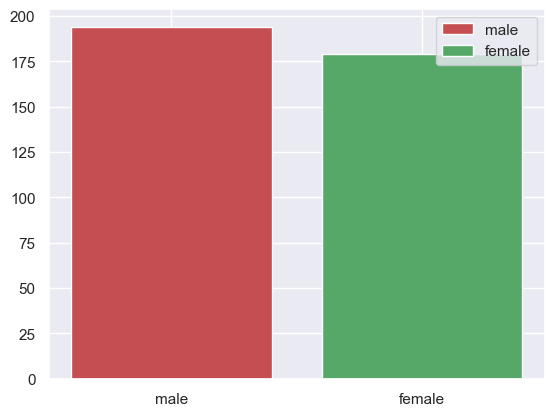

In [23]:
no_of_male = len(insured[insured['Gender'] == 'Male'])
no_of_female = len(insured[insured['Gender'] == 'Female'])

plt.bar(['male','female'],[no_of_male,no_of_female],color = ['r','g'],label = ['male','female'])
plt.legend()
plt.show()

194 179


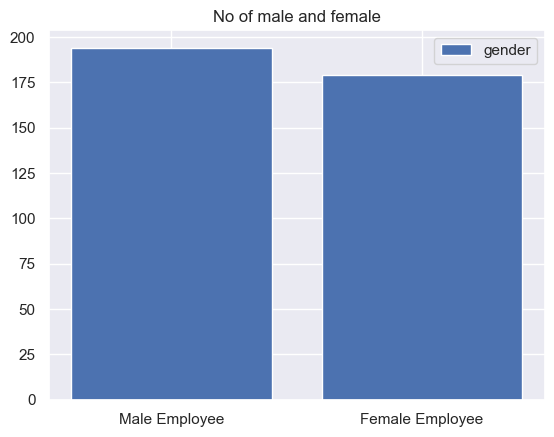

In [24]:
#Alternet
#for gender
no_of_male = len(insured[insured['Gender'] == 'Male'])
no_of_female = len(insured[insured['Gender'] == 'Female'])
print(no_of_male,no_of_female)

plt.bar(['Male Employee','Female Employee'],[no_of_male,no_of_female], label='gender')
plt.title('No of male and female')
plt.legend()
plt.show()

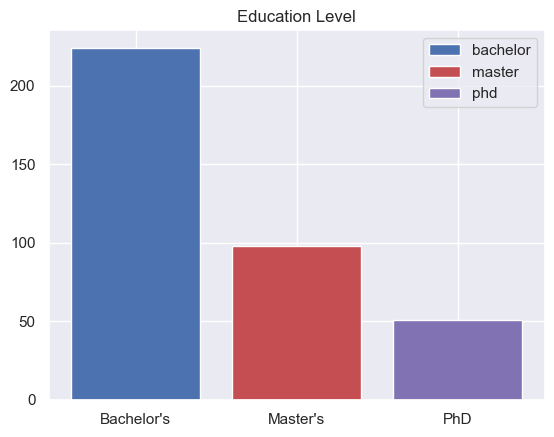

In [25]:
bachelor = len(insured[insured['Education Level'] == "Bachelor's"])
master = len(insured[insured['Education Level'] == "Master's"])
phd = len(insured[insured['Education Level'] == 'PhD'])


plt.bar(["Bachelor's","Master's",'PhD'],
 [bachelor,master,phd], label=['bachelor','master','phd'],
        color = ['b','r','m'])
plt.title('Education Level')
plt.legend()
plt.show()

# analyzing categorical data

In [26]:
data = {}
list_col=  insured.select_dtypes(['category']).columns
for i in range(len(list_col)):
  values = list(insured[list_col[i]].value_counts())
  subcategory = list(insured[list_col[i]].value_counts().index)
  # data['x'] = values
  data[list_col[i]] = [subcategory,values]

data

{'Gender': [['Male', 'Female'], [194, 179]],
 'Education Level': [["Bachelor's", "Master's", 'PhD'], [224, 98, 51]],
 'Job Title': [['Director of Marketing',
   'Director of Operations',
   'Senior Business Analyst',
   'Senior Marketing Analyst',
   'Senior Marketing Manager',
   'Junior Business Analyst',
   'Junior Financial Analyst',
   'Senior Project Manager',
   'Junior Business Development Associate',
   'Senior Financial Analyst',
   'Senior Data Scientist',
   'Senior Product Manager',
   'Senior Software Engineer',
   'Junior Marketing Coordinator',
   'Senior Financial Manager',
   'Senior Product Designer',
   'Senior Operations Manager',
   'Junior Marketing Specialist',
   'Junior Operations Analyst',
   'Junior Project Manager',
   'Senior Project Coordinator',
   'Senior Data Engineer',
   'Senior Marketing Specialist',
   'Senior Operations Coordinator',
   'Senior Business Development Manager',
   'Junior Product Manager',
   'Junior Sales Representative',
   'Junior

In [53]:
# Bar Graph

In [27]:
data['Education Level'][1]
# count values of education level

[224, 98, 51]

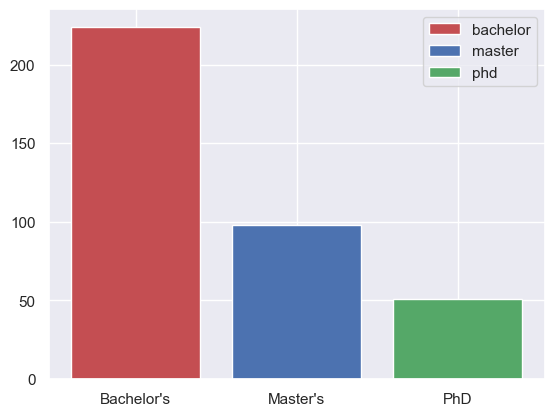

In [28]:
plt.bar(data['Education Level'][0],data['Education Level'][1],label=['bachelor','master','phd'],
        color = ['r','b','g'])
plt.legend()
plt.show()

[['Male', 'Female'], [194, 179]]


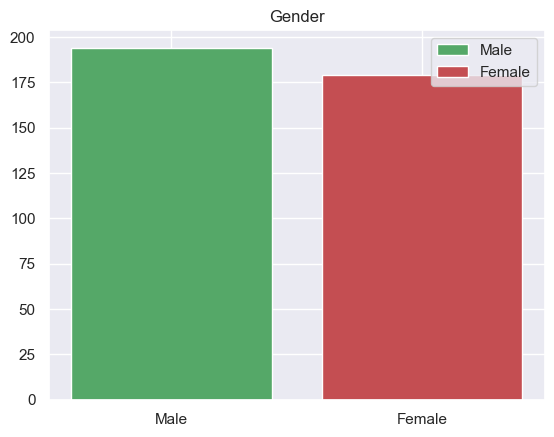

In [29]:
print(data['Gender'])
plt.bar(data['Gender'][0],data['Gender'][1],
        label=['Male','Female'],
        color = ['g','r'])
plt.title('Gender')
plt.legend()
plt.show()

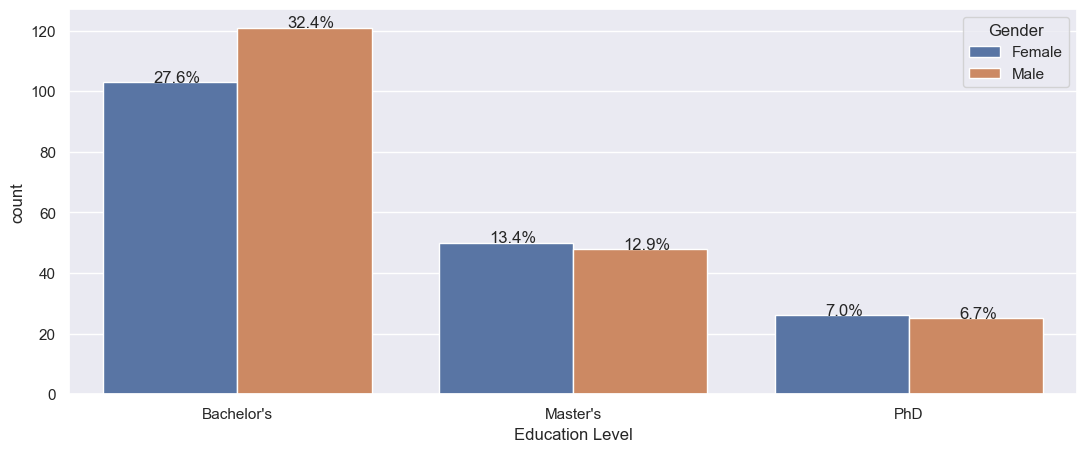

In [30]:
#Educational level vs Gender
plt.figure(figsize=(13,5))
ax=sns.countplot(x='Education Level',hue='Gender',data=insured)
bar_perc(ax,insured['Gender'])


## Bivariate & Multivariate Analysis

In [31]:
insured

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [32]:
insured.corr()
# correlation quantitative values ma matra garna milxa

,Age,Years of Experience,Salary
Age,1.000000,0.979128,0.922335
Years of Experience,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


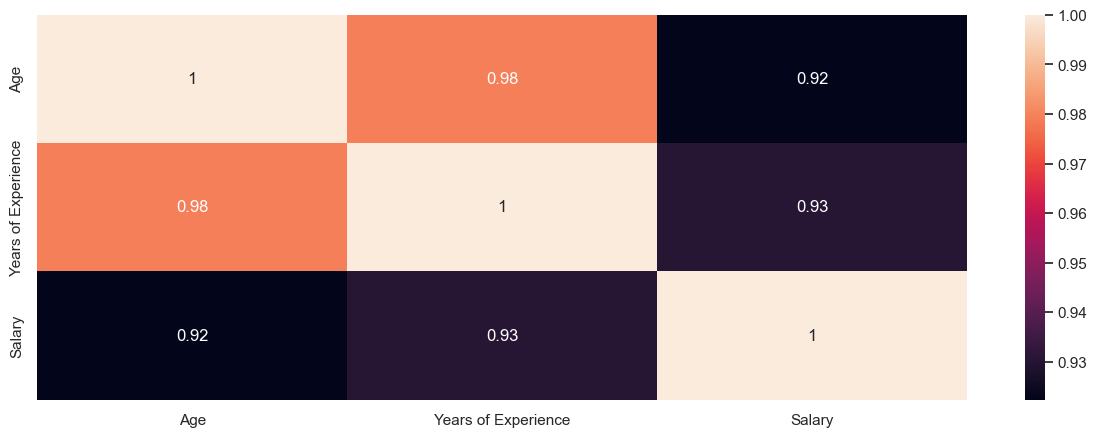

In [33]:
plt.figure(figsize=(15,5))
sns.heatmap(insured.corr(),annot=True)
plt.show()

**Observation**
 - All of them have nearly equal correlation


<Figure size 500x500 with 0 Axes>

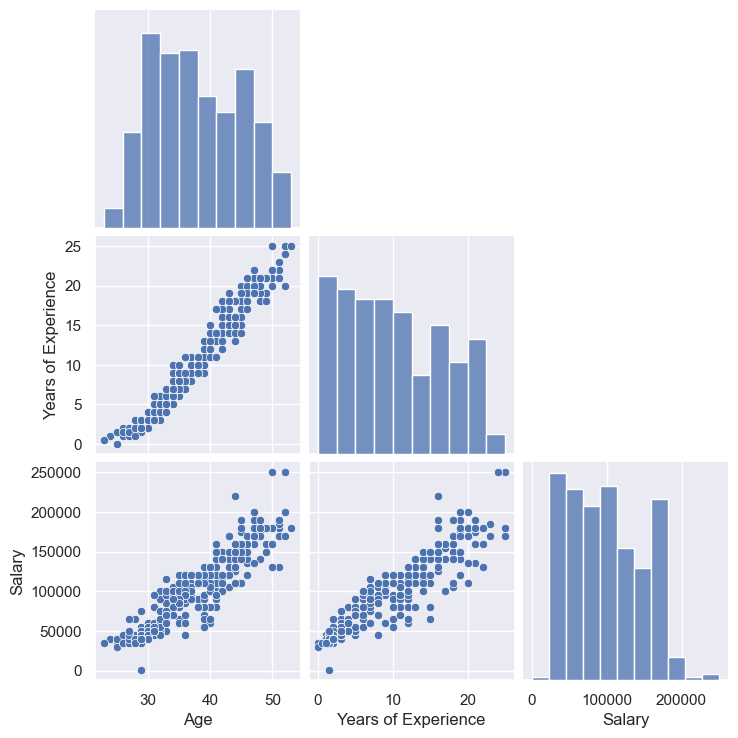

In [34]:
plt.figure(figsize=(5,5))
sns.pairplot(data=insured , corner=True)
plt.show()

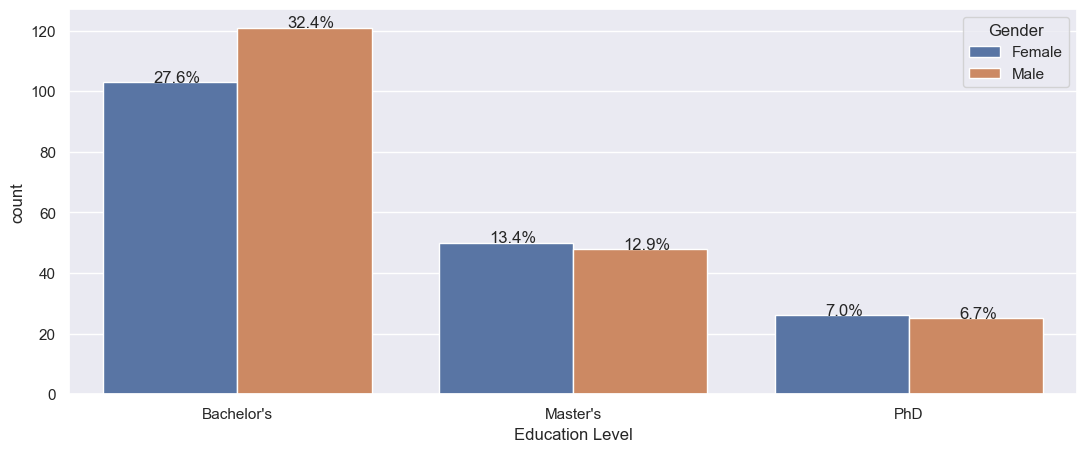

In [35]:
#Educational level vs Gender
plt.figure(figsize=(13,5))
ax=sns.countplot(x='Education Level',hue='Gender',data=insured)
bar_perc(ax,insured['Gender'])


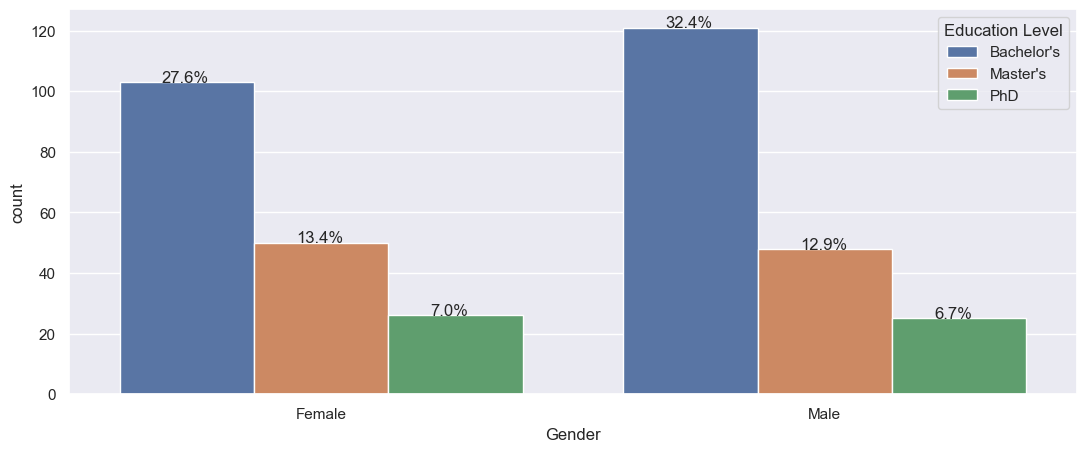

In [36]:
# Gender vs Education Level
plt.figure(figsize=(13,5))
ax=sns.countplot(x='Gender',hue='Education Level',data=insured)
bar_perc(ax,insured['Education Level'])


[Text(0.5, 1.0, 'Education Level vs Salary')]

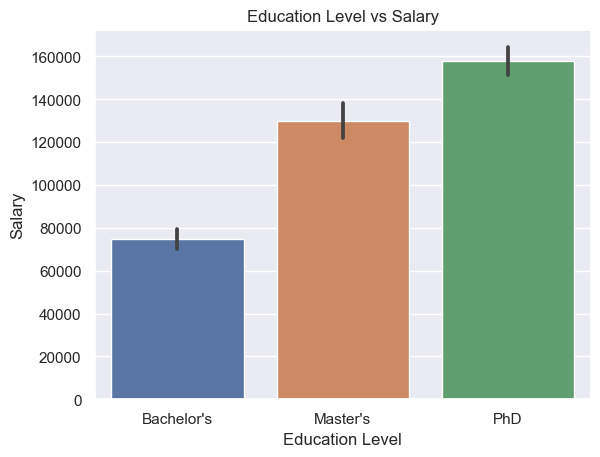

In [37]:
#Education Level vs Salary
sns.barplot(x=insured['Education Level'],y=insured.Salary).set(title="Education Level vs Salary")
# quantative ra categorical data analysis

**Observation**
- Salary of phd education level is high
- Salary of people having education level bachelors is lower than masters.

[Text(0.5, 1.0, 'Gender vs Education Level')]

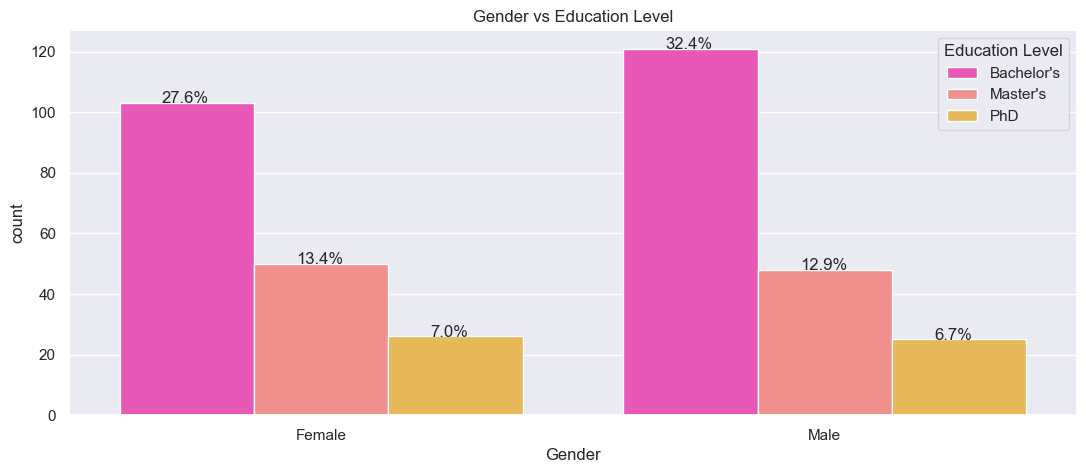

In [38]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='Gender',hue='Education Level',data=insured,palette='spring')
bar_perc(ax,insured['Education Level'])
ax.set(title="Gender vs Education Level")

**Observations**
 - Female having educaion level bachelors is lower than of male

In [39]:
insured.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [105]:
# GROUP BY

In [40]:
insured.groupby(insured.Gender).Salary.mean()      #GROUP BY BY Gender

Gender
Female     97011.173184
Male      103867.783505
Name: Salary, dtype: float64

In [41]:
insured.groupby(insured['Education Level']).Salary.mean()      #GROUP BY BY Education Level

Education Level
Bachelor's     74756.026786
Master's      129795.918367
PhD           157843.137255
Name: Salary, dtype: float64

In [42]:
insured.groupby(insured['Job Title']).Salary.mean()      #GROUP By job title

Job Title
Account Manager                  75000.0
Accountant                       55000.0
Administrative Assistant         50000.0
Business Analyst                 77500.0
Business Development Manager     90000.0
                                  ...   
UX Designer                      80000.0
UX Researcher                    65000.0
VP of Finance                   200000.0
VP of Operations                190000.0
Web Developer                    65000.0
Name: Salary, Length: 174, dtype: float64

In [43]:
insured

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


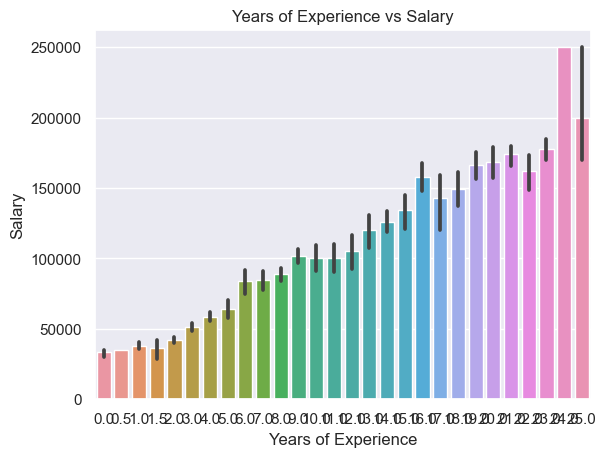

In [44]:
ax = sns.barplot(x=insured['Years of Experience'],y=insured.Salary).set(title="Years of Experience vs Salary")
# bar_perc(ax,insured['sex'])
# ax.set(title="Sex vs Region")

[Text(0.5, 1.0, 'Gender Vs Salary')]

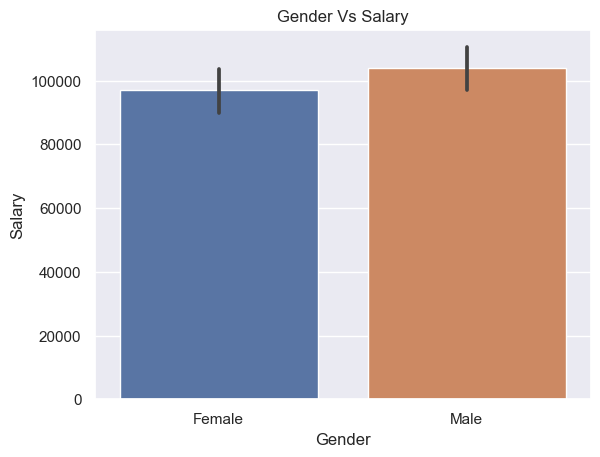

In [45]:
sns.barplot(x=insured.Gender,y=insured.Salary).set(title='Gender Vs Salary')

[Text(0.5, 1.0, 'Age vs Salary')]

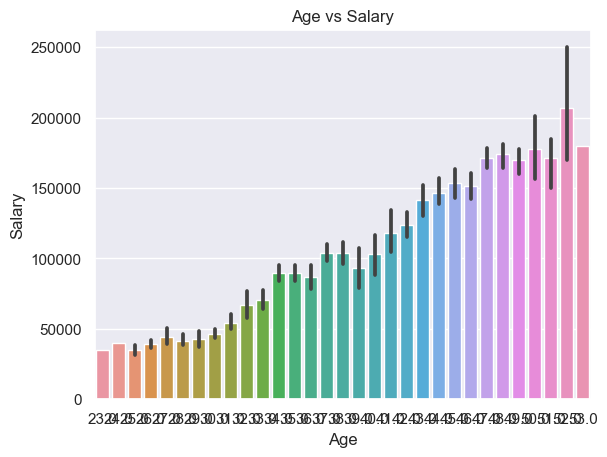

In [46]:
sns.barplot(x='Age',y='Salary',data=insured).set(title='Age vs Salary')

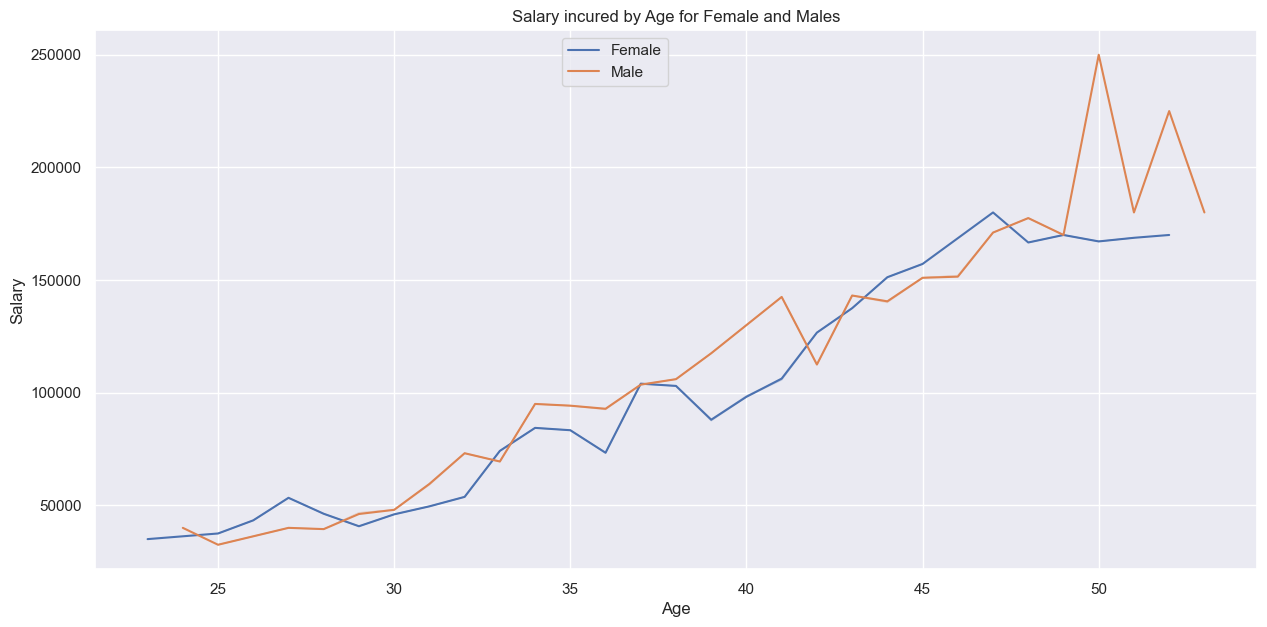

In [47]:
#multivariate
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["Age"], y =insured["Salary"],hue=insured["Gender"],ci=1).set(title= 'Salary incured by Age for Female and Males')
plt.legend(bbox_to_anchor=(0.5, 1))
plt.show()

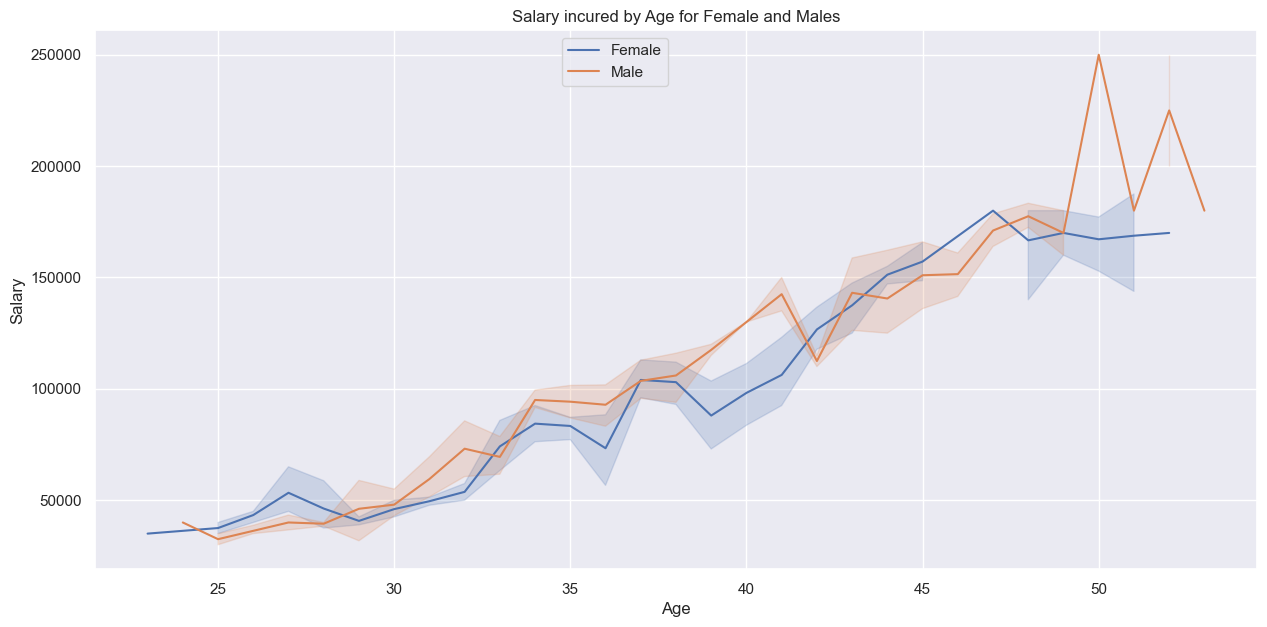

In [48]:
#multivariate
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["Age"], y =insured["Salary"],hue=insured["Gender"]).set(title= 'Salary incured by Age for Female and Males')
plt.legend(bbox_to_anchor=(0.5, 1))
plt.show()

In [49]:
#Cross tab
df_education_gender=pd.crosstab(index=insured['Education Level'], columns=insured.Gender, values=insured.Salary, aggfunc='mean')
df_education_gender


Gender,Female,Male
Education Level,,
Bachelor's,71019.417476,77936.776860
Master's,120200.000000,139791.666667
PhD,155384.615385,160400.000000


In [50]:
#Cross tab
df_education_gender1=pd.crosstab(index=insured['Education Level'], columns=insured.Gender, values=insured.Salary, aggfunc='sum')
df_education_gender1

Gender,Female,Male
Education Level,,
Bachelor's,7315000.0,9430350.0
Master's,6010000.0,6710000.0
PhD,4040000.0,4010000.0


In [117]:
# plot directly from dataframe

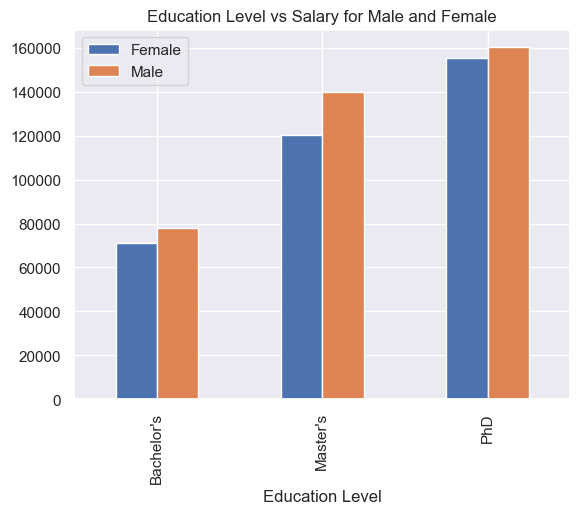

In [51]:
df_education_gender.plot(kind='bar',title="Education Level vs Salary for Male and Female")
plt.legend(loc='upper left')
plt.show()

In [52]:
df_job_gender=pd.crosstab(index=insured['Job Title'], columns=insured.Gender, values=insured.Salary,aggfunc='mean')
df_job_gender

Gender,Female,Male
Job Title,,
Account Manager,NaN,75000.0
Accountant,55000.0,NaN
Administrative Assistant,50000.0,NaN
Business Analyst,80000.0,75000.0
Business Development Manager,NaN,90000.0
...,...,...
UX Designer,80000.0,NaN
UX Researcher,65000.0,NaN
VP of Finance,NaN,200000.0


In [53]:
# converting quantitative data to qualitative
insured

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [54]:
#creating groups of age
category = pd.cut(insured.Age,bins=[20,25,30,35,40,45,50],labels=['20-25','25-30','30-35','35-40','40-45','45-50'])
insured.insert(5,'Age Group',category)


In [55]:
insured.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Age Group,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,30-35,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,25-30,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,40-45,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,35-40,60000.0
4,52.0,Male,Master's,Director,20.0,NaN,200000.0


In [56]:
insured.groupby(insured['Age Group']).Salary.mean()

Age Group
20-25     35833.333333
25-30     43288.805970
30-35     74375.000000
35-40     97222.222222
40-45    139315.068493
45-50    168700.000000
Name: Salary, dtype: float64

In [57]:
category1=pd.cut(insured['Years of Experience'],bins=[1,10,20],labels=['1-10','10-20'])
insured.insert(6,'Experience Year group ',category1)

In [58]:
insured.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Age Group,Experience Year group,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,30-35,1-10,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,25-30,1-10,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,40-45,10-20,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,35-40,1-10,60000.0
4,52.0,Male,Master's,Director,20.0,NaN,10-20,200000.0


In [61]:
age_bin_cat = insured.groupby(insured['Experience Year group ']).Salary.mean()
age_bin_cat

Experience Year group 
1-10      69855.365854
10-20    138527.131783
Name: Salary, dtype: float64

<Axes: title={'center': 'Experience Year group vs Avg salary'}, xlabel='Experience Year group '>

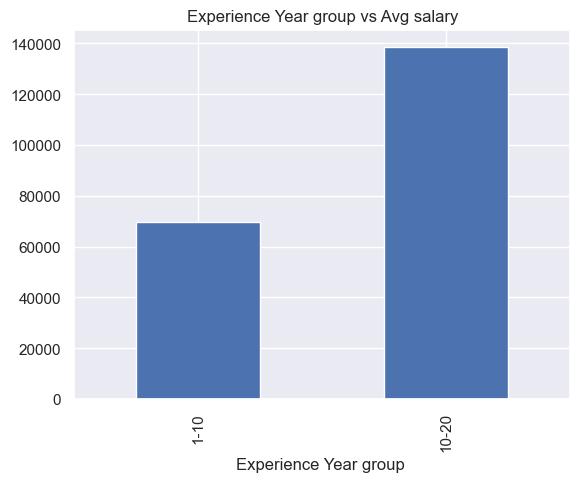

In [62]:
age_bin_cat.plot(kind='bar',title="Experience Year group vs Avg salary")


In [129]:
#multi variate data analysis
insured.groupby(['region','sex','smoker']).expenses.mean()

region     sex     smoker
northeast  female  no         9640.427121
                   yes       28032.045517
           male    no         8664.042640
                   yes       30926.252895
northwest  female  no         8786.998519
                   yes       29670.824828
           male    no         8320.689167
                   yes       30713.180690
southeast  female  no         8440.205396
                   yes       33034.821389
           male    no         7609.003731
                   yes       36029.839636
southwest  female  no         8234.091702
                   yes       31687.988571
           male    no         7778.906111
                   yes       32598.863784
Name: expenses, dtype: float64

In [130]:
insured.groupby(['region','sex','smoker']).expenses.mean().unstack()

smoker                     no           yes
region    sex                              
northeast female  9640.427121  28032.045517
          male    8664.042640  30926.252895
northwest female  8786.998519  29670.824828
          male    8320.689167  30713.180690
southeast female  8440.205396  33034.821389
          male    7609.003731  36029.839636
southwest female  8234.091702  31687.988571
          male    7778.906111  32598.863784

[Text(0.5, 1.0, 'Age Vs Charges')]

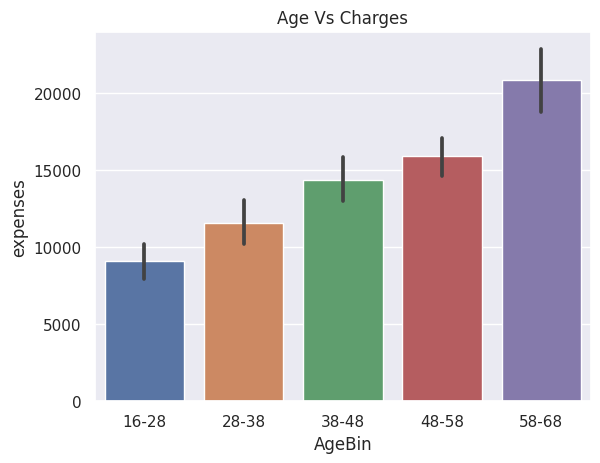

In [131]:
sns.barplot(x=insured.AgeBin,y=insured.expenses).set(title='Age Vs Charges')

<Axes: xlabel='BMIGroup', ylabel='expenses'>

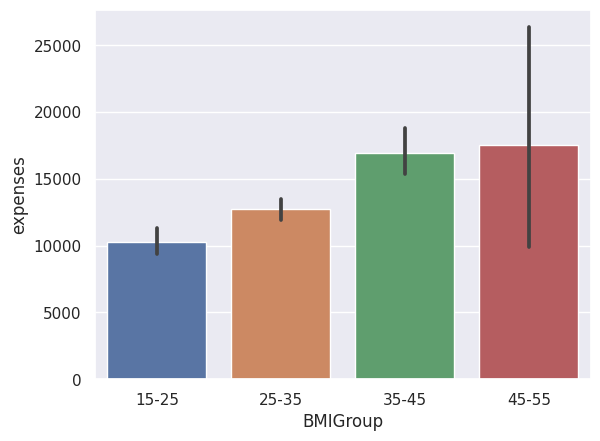

In [132]:
sns.barplot(x=insured.BMIGroup,y=insured.expenses)

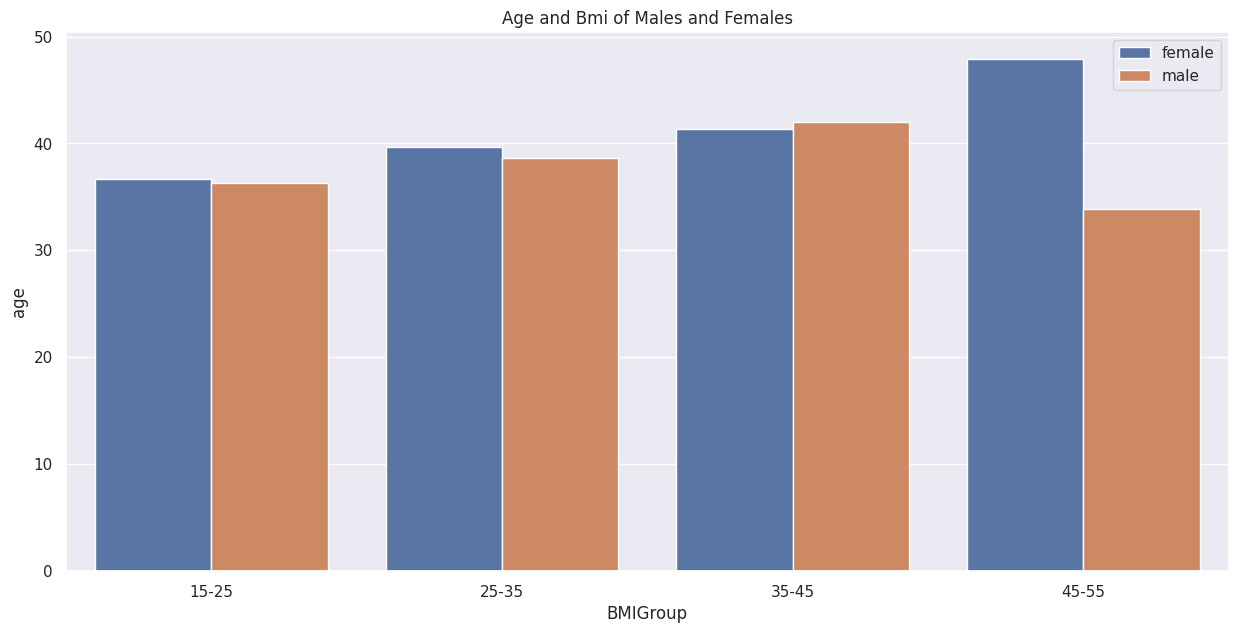

In [133]:
plt.figure(figsize=(15,7))
sns.barplot(x=insured["BMIGroup"],y=insured["age"],hue=insured['sex'],ci=0).set(title= 'Age and Bmi of Males and Females')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

[Text(0.5, 1.0, 'Fig 2:BMI group and Charges ')]

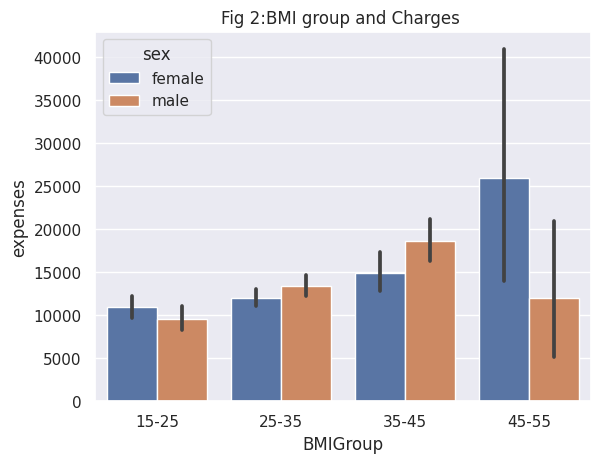

In [134]:
sns.barplot(x='BMIGroup',y='expenses',hue='sex',data=insured).set(title="Fig 2:BMI group and Charges " )

**Observations**
- FeMales with most BMI has incured most charges to the insurance company
- BMI for male and females are not same
- Beneficary with higher BMI have incurred more cost to insurance.

In [135]:
pd.crosstab(insured['sex'],insured['children'])


children,0,1,2,3,4,5
sex,,,,,,
female,289,158,119,77,11,8
male,285,166,121,80,14,10


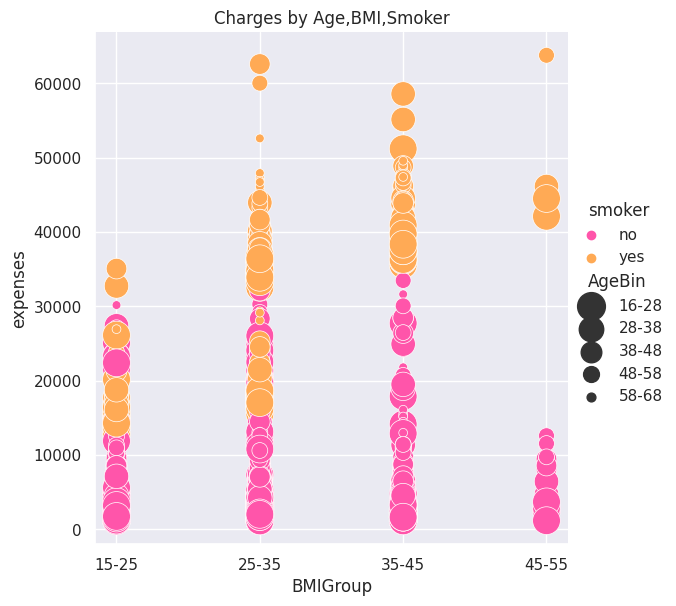

In [136]:
sns.relplot(x=insured.BMIGroup, y=insured.expenses, hue=insured.smoker, size= insured.AgeBin,
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Charges by Age,BMI,Smoker');

In [137]:
insured

,age,sex,bmi,children,smoker,BMIGroup,AgeBin,region,expenses
0,19,female,27.9,0,yes,25-35,16-28,southwest,16884.92
1,18,male,33.8,1,no,25-35,16-28,southeast,1725.55
2,28,male,33.0,3,no,25-35,16-28,southeast,4449.46
3,33,male,22.7,0,no,15-25,28-38,northwest,21984.47
4,32,male,28.9,0,no,25-35,28-38,northwest,3866.86
...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,25-35,48-58,northwest,10600.55
1334,18,female,31.9,0,no,25-35,16-28,northeast,2205.98
1335,18,female,36.9,0,no,35-45,16-28,southeast,1629.83
1336,21,female,25.8,0,no,25-35,16-28,southwest,2007.95


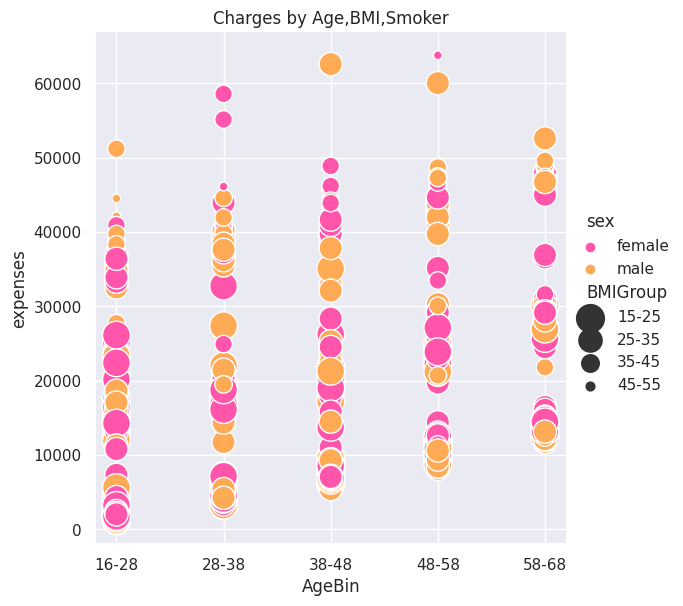

In [138]:
sns.relplot(x=insured.AgeBin, y=insured.expenses, hue=insured.sex, size= insured.BMIGroup,
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Charges by Age,BMI,Smoker');

**Observation**
- Males who smoker have incured more cost compared to nonsmokers.
- As age increased claims increased
-Smoker have higher medical claims

# Conclusion based on EDA
- As expected , as the age of the beneficiary  increases ,the cost to insurance increases.
- Males who smoke have most claims and have higher bills.
- Female who are nonsmoker also have more claims to nonsmoker males this may be because of child birth , need to explore claims type to understand better.
- Beneficiary with 2 or 3 dependent  have billed higher compared to others people who have 5.This is unusual and may be because of  uneven number of observations in each group. For example, no dependents group has 574 observations whereas five dependents group only has 18.
- Customer with bmi  >30 are  on higher side of obesity, have more health issues and have higher claims.
- Females with BMI more than 45 have billed higher to insurance.
- Age, BMI and Smoking are important attributes which can cost insurance company more.


# Statistical Analysis

# 1.Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

<div class ="alert alert-block alert-info">

---


    <font size=3><b>    Step 1: Define null and alternative hypothesis</b></font><br>
$\ H_0  :  \mu_1 <= \mu_2  $ The average charges of smokers is less than or equal to nonsmokers
 <br>


$\ H_a  :\mu_1 > \mu_2 $ The average charges of smokers is greater than nonsmokers  <br>
</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3: Identify the test</b></font>

Standard deviation of the population is not known  ,will perform a T stat test .  The > sign in alternate hypothesis indicate  test is right tailed, that is all z values that would cause us to reject null hypothesis are in just one tail to the right of  sampling  distribution curve.

    


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [139]:
smoker=insured.loc[insured.smoker=="yes"]
smoker.head()

,age,sex,bmi,children,smoker,BMIGroup,AgeBin,region,expenses
0,19,female,27.9,0,yes,25-35,16-28,southwest,16884.92
11,62,female,26.3,0,yes,25-35,58-68,southeast,27808.73
14,27,male,42.1,0,yes,35-45,16-28,southeast,39611.76
19,30,male,35.3,0,yes,35-45,28-38,southwest,36837.47
23,34,female,31.9,1,yes,25-35,28-38,northeast,37701.88


In [140]:
smoker.count()

age         274
sex         274
bmi         274
children    274
smoker      274
BMIGroup    274
AgeBin      274
region      274
expenses    274
dtype: int64

In [141]:
nonsmoker=insured.loc[insured.smoker=='no']
nonsmoker.head()

,age,sex,bmi,children,smoker,BMIGroup,AgeBin,region,expenses
1,18,male,33.8,1,no,25-35,16-28,southeast,1725.55
2,28,male,33.0,3,no,25-35,16-28,southeast,4449.46
3,33,male,22.7,0,no,15-25,28-38,northwest,21984.47
4,32,male,28.9,0,no,25-35,28-38,northwest,3866.86
5,31,female,25.7,0,no,25-35,28-38,southeast,3756.62


In [142]:
nonsmoker.count()

age         1064
sex         1064
bmi         1064
children    1064
smoker      1064
BMIGroup    1064
AgeBin      1064
region      1064
expenses    1064
dtype: int64

In [143]:
# Adjusting the size of the rows to be equal
nonsmoker = nonsmoker[0:274]
charges_yes = smoker.expenses
charges_no = nonsmoker.expenses

In [144]:
print(f'Average Cost charged to Insurance for smoker is {charges_yes.mean()} and nonsmoker is {charges_no.mean()} ')


Average Cost charged to Insurance for smoker is 32050.23197080292 and nonsmoker is 8460.786167883212 


[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

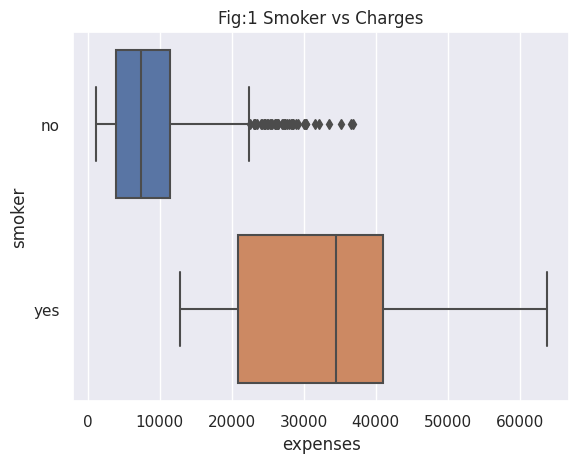

In [145]:
#smoker vs charges
sns.boxplot(x=insured.expenses,y=insured.smoker,data=insured).set(title="Fig:1 Smoker vs Charges")

In [146]:
charges_no

1       1725.55
2       4449.46
3      21984.47
4       3866.86
5       3756.62
         ...   
350    11830.61
351     8932.08
352     3554.20
353    12404.88
354    14133.04
Name: expenses, Length: 274, dtype: float64

In [147]:
alpha = 0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))


Test statistic = 29.96693762930951 , Pvalue =2.11900162618799e-117 , OnetailPvalue = 1.059500813093995e-117


In [148]:
if p_value_1 < alpha :
    print(f"Conclusion:Since P value {p_value_onetail} is less than alpha {alpha} " )
    # print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    # print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

Conclusion:Since P value 1.059500813093995e-117 is less than alpha 0.05 


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide whethere to  reject or failed to reject null hypothesis</b></font><br>    
    We reject the null hypothesis and can conclude that people who smoke have on an average larger medical claim compared to people who don't smoke. Similar result can also been seen in Fig no.1 Smokers Vs Charges

# 2.Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

<div class ="alert alert-block alert-info">
    Let $\mu_1 \mu_2 $ and be the respective population means for BMI of males and BMI of females<br>
    <font size=3><b>    Step 1: Define null and alternative hypothesis</b></font><br>
$\ H_0  : \mu_1 - \mu_2 = 0$ There is no difference between the BMI of Male  and BMI of female.<br>
$\ H_a  : \mu_1 - \mu_2 !=0 $ There is difference between the BMI of Male and BMI of female. <br>


</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3:Identify the test</b></font><br>Standard deviation of the population is not known ,will perform a T stat test.Not equal to sign in alternate hypothesis indicate its a two tailed test.

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [149]:
#get all observation for male.
df_male=insured.loc[insured.sex=="male"]
#get all observation for females
df_female=insured.loc[insured.sex=="female"]


In [150]:
#get bmi of male and female
bmi_female=df_female.bmi
bmi_male=df_male.bmi

<Axes: xlabel='bmi', ylabel='Density'>

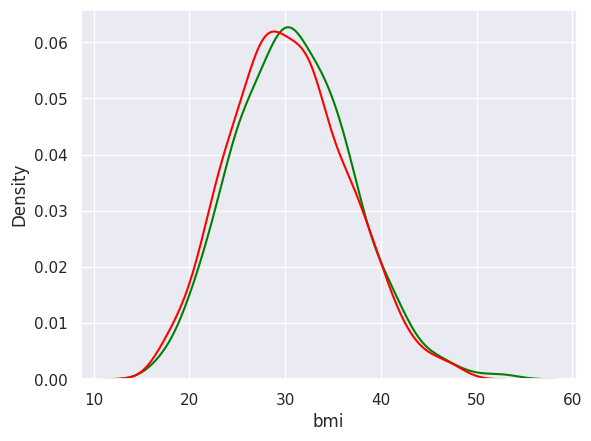

In [151]:
sns.distplot(bmi_male,color='green',hist=False)
sns.distplot(bmi_female,color='red',hist=False)


In [152]:
df_female.bmi.mean()

30.3797583081571

In [153]:
df_male.bmi.mean()

30.94526627218935

In [154]:
# get statistic and p value
t_statistic_2, p_value_2 = stats.ttest_ind(bmi_male, bmi_female)
print("tstats = ",t_statistic_2, ", pvalue = ", p_value_2)

tstats =  1.6970846764986391 , pvalue =  0.08991356987176295


In [155]:
if p_value_2 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_2,alpha) )
    print("Reject Null Hypothesis  that there is no difference in bmi of men and bmi of female.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_2,alpha))
    print("Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .")


Conclusion:Since P value 0.08991356987176295 is greater than alpha 0.05 
Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide to reject or accept null hypothesis</b></font><br>
     We fail to reject the null hypothesis and can conclude that There is no difference between BMI of Female and BMI of Male.

### Recommendation
- Based on EDA and statistical  evidence it can be seen that  customer who smoke or   have higher  BMI  have more higher claims. We can encourage customers to quit smoking by providing them  incentive points  for talking to life coach, get help for improving lifestyle habits,  Quit Tobacco- 28 day program. Give gift cards when customer accumulates specific number of points.
- We can have Active wellness programs which can help up reduce claims related to BMI.
- High BMI  is primarily because of unhealthy life choices. We can provide customers with Diet plans and wellness health coaches which can help them to make right choices.
- Provide discount coupons  for Gym  or  fitness devices encouraging customers to exercise.
